# Loading the Iris Dataset

In [1]:
import pandas as pd

# Load the Iris dataset
iris_data = pd.read_csv('iris/iris.csv')
print(iris_data.head())


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


#  Encoding Species and Splitting Dataset

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the 'species' column
label_encoder = LabelEncoder()
iris_data['species'] = label_encoder.fit_transform(iris_data['species'])

# Split the dataset into features (X) and target label (y)
X = iris_data.drop('species', axis=1)
y = iris_data['species']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.head())
print(y_train.head())


     sepal_length  sepal_width  petal_length  petal_width
81            5.5          2.4           3.7          1.0
133           6.3          2.8           5.1          1.5
137           6.4          3.1           5.5          1.8
75            6.6          3.0           4.4          1.4
109           7.2          3.6           6.1          2.5
81     1
133    2
137    2
75     1
109    2
Name: species, dtype: int32


# Training Logistic Regression Model

In [3]:
from sklearn.linear_model import LogisticRegression

# Creating and training the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

# Making Predictions on New Data

In [5]:
# Load the new Iris data (for predictions)
new_iris_data = pd.read_csv('iris/iris.csv')
new_X = new_iris_data.drop('species', axis=1)

# Predict the species for the new data
new_predictions = model.predict(new_X)

# Add the predictions to the dataframe
new_iris_data['predicted_species'] = label_encoder.inverse_transform(new_predictions)
print(new_iris_data.head())


   sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

  predicted_species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  


# Data Visualization

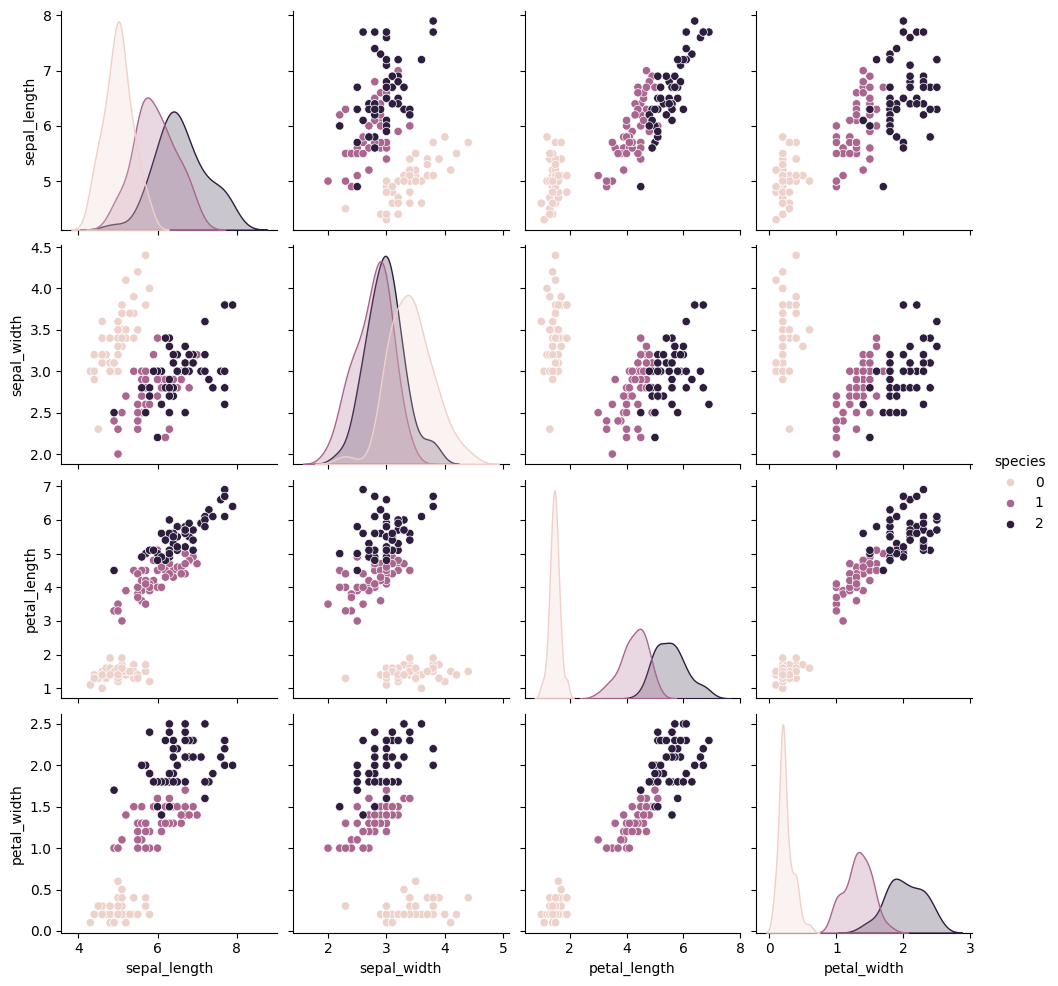

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize the relationships between features
sns.pairplot(iris_data, hue="species")
plt.show()


# Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled[:5])


[[-0.4134164  -1.46440146 -0.10014569 -0.32149987]
 [ 0.55122187 -0.49582097  0.71771076  0.35364985]
 [ 0.67180165  0.2306144   0.95138404  0.75873969]
 [ 0.91296121 -0.01153072  0.30878254  0.21861991]
 [ 1.63643991  1.44134002  1.30189395  1.7039493 ]]


# Experimenting with Different Models

In [8]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Trying different models
models = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    print(f"{name} Accuracy:", model.score(X_test_scaled, y_test))


SVM Accuracy: 1.0
KNN Accuracy: 1.0


# Hyperparameter Tuning

In [9]:
from sklearn.model_selection import GridSearchCV

# Example with KNN
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)


Best parameters: {'n_neighbors': 3}
Best cross-validation score: 0.9428571428571428


# Permutation Importance

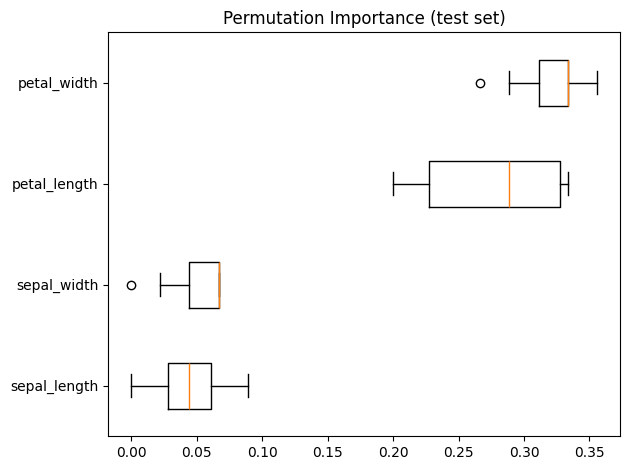

In [11]:
from sklearn.inspection import permutation_importance

# Assuming 'model' is your trained KNN model
result = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, random_state=42)

perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=X_test.columns[perm_sorted_idx])
plt.title("Permutation Importance (test set)")
plt.tight_layout()
plt.show()


# What is the average measurement for each feature per species?

In [13]:
# Load the dataset
iris_data = pd.read_csv('iris/iris.csv')

# Group by species and calculate mean
average_per_species = iris_data.groupby('species').mean()
print(average_per_species)


                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


# How many samples are there for each species?

In [14]:
# Count the number of samples per species
species_count = iris_data['species'].value_counts()
print(species_count)


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


# Are there any outliers in sepal length across different species?

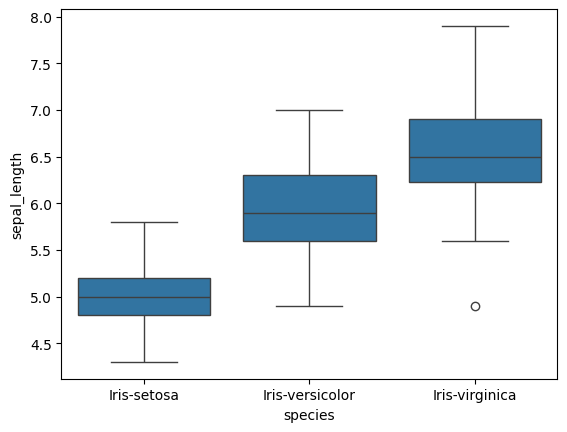

In [16]:
import seaborn as sns

# Boxplot for sepal length across species
sns.boxplot(x='species', y='sepal_length', data=iris_data)
plt.show()


# How does petal length vary with petal width?

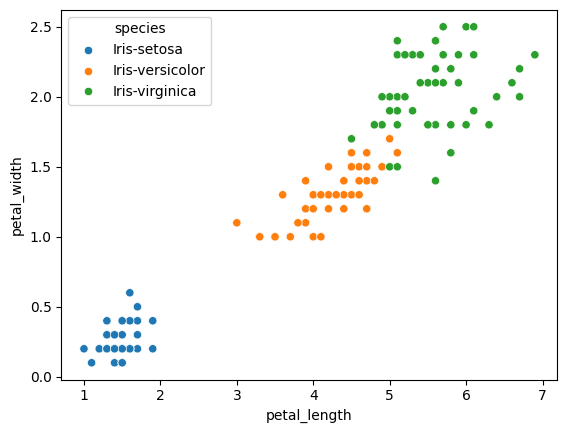

In [17]:
# Scatter plot of petal length vs petal width
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris_data)
plt.show()


# What is the correlation between each pair of features?


In [19]:
# Assuming iris_data is your DataFrame and it's already been loaded
numeric_data = iris_data.select_dtypes(include=[float, int])  # Select only numeric columns
correlation_matrix = numeric_data.corr()  # Calculate correlation matrix for numeric columns only
print(correlation_matrix)


              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


# What is the distribution of sepal length across different species?

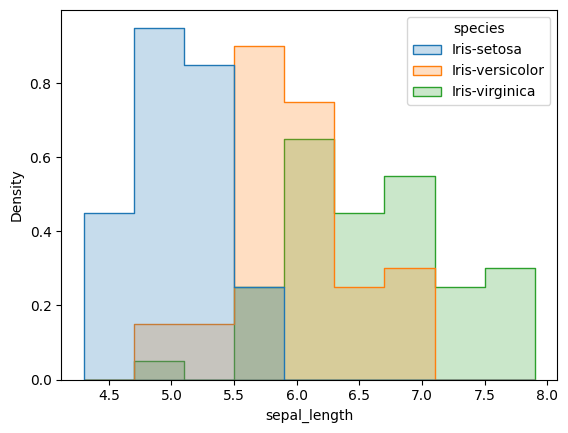

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of sepal length for each species
sns.histplot(iris_data, x="sepal_length", hue="species", element="step", stat="density", common_norm=False)
plt.show()


# Is there any relationship between sepal width and petal width?

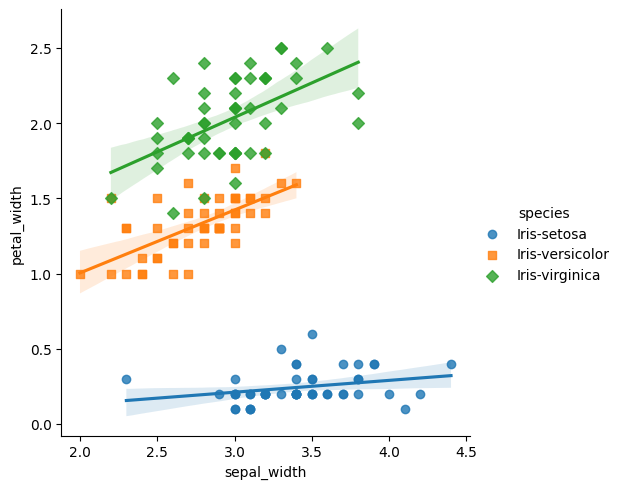

In [21]:
# Scatter plot with regression line
sns.lmplot(x="sepal_width", y="petal_width", hue="species", data=iris_data, markers=["o", "s", "D"])
plt.show()


# What are the average dimensions (sepal and petal) for each species?

In [22]:
# Group by species and calculate mean for dimensions
mean_dimensions = iris_data.groupby('species').agg({"sepal_length": "mean", "sepal_width": "mean", "petal_length": "mean", "petal_width": "mean"})
print(mean_dimensions)


                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


# How does the size of the sepal compare to the size of the petal within each species?

In [23]:
# Adding new columns for sepal area and petal area
iris_data["sepal_area"] = iris_data["sepal_length"] * iris_data["sepal_width"]
iris_data["petal_area"] = iris_data["petal_length"] * iris_data["petal_width"]

# Group by species and calculate mean for new areas
area_comparison = iris_data.groupby('species').agg({"sepal_area": "mean", "petal_area": "mean"})
print(area_comparison)


                 sepal_area  petal_area
species                                
Iris-setosa         17.2088      0.3628
Iris-versicolor     16.5262      5.7204
Iris-virginica      19.6846     11.2962


# Can we cluster the species based on sepal and petal measurements?

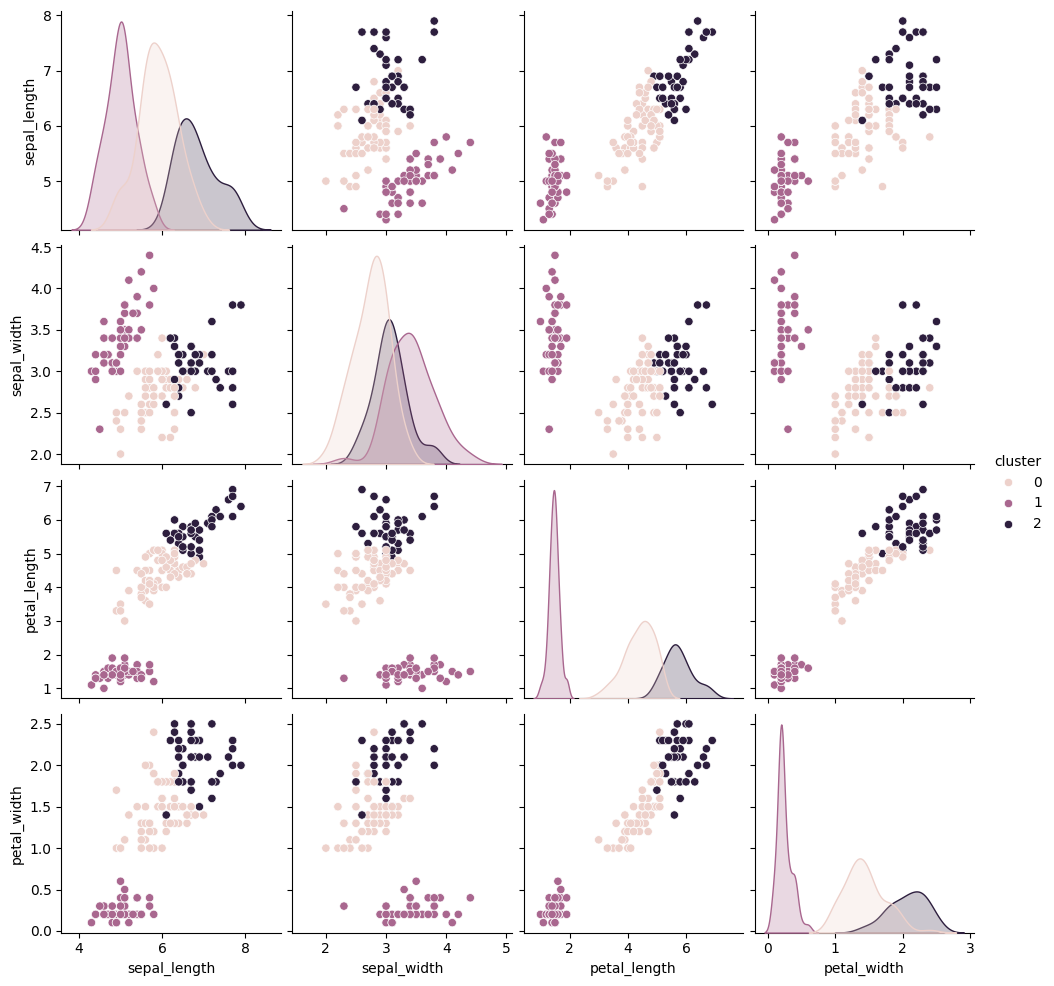

In [25]:
from sklearn.cluster import KMeans

# Using KMeans clustering with n_init set explicitly
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
clusters = kmeans.fit_predict(iris_data[["sepal_length", "sepal_width", "petal_length", "petal_width"]])

# Adding clusters to the dataset and plotting
iris_data["cluster"] = clusters
sns.pairplot(iris_data, hue="cluster", vars=["sepal_length", "sepal_width", "petal_length", "petal_width"])
plt.show()

